## ***Data Visualization of COVID-19 Confirmed Cases in the World***

Note that these plots have been done after dropping the columns where 70% number of confirmed cases is zero.

### **Countrywise Plot**

In [1]:
#imported all the required packages
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Specified the path to my dataset and loaded it in a dataframe
url1="https://raw.githubusercontent.com/Yogita98/Data-Visualization-of-Corona-Positive-Cases/master/time_series_2019-ncov-Confirmed.csv"
df_covid = pd.read_csv(url1,index_col=0)

In [3]:
#Dropped the columns whose total number of positive cases on a particular day were less than 70%
for i in df_covid.columns:
  var=0.7*df_covid[i].count()
  if len(df_covid[df_covid[i]==0])>var:
    df_covid.drop([i],axis=1,inplace=True)
df_covid.columns

Index(['Country/Region', 'Lat', 'Long', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [4]:
#Computed the sum of Corona positive cases country wise and put it in a new column of the dataframe
labels=['Province/State','Lat', 'Long']
# df_covid.drop(labels=labels,axis=1,inplace=True)
column_list=[]
for col in df_covid.columns:
  column_list.append(col)
column_list.remove('Country/Region')
# column_list
df_covid["sum"] = df_covid[column_list].sum(axis=1)
cols=df_covid.columns
print(df_covid["sum"])

Province/State
NaN     2881
NaN    13329
NaN     4388
NaN       20
NaN     8230
       ...  
NaN        1
NaN        1
NaN        1
NaN        1
NaN        1
Name: sum, Length: 487, dtype: int64


In [5]:
#Created a dictionary of Countries and the sum of Corona positive cases
dict_country={}
x=0
l1=df_covid['Country/Region'].values
l2=df_covid['sum'].values
for key,value in zip(l1,l2):
    if key not in dict_country:
        dict_country[key]=[value]
    else:
        dict_country[key].append(value)

#After creating the dictionary, there were a lot number of (key,value) pairs having a common key 
#since the dataset has one or more number countries having multiple entries. 
#And since the countries are keys in the dictionary, I replaced the keys having multiple values with their sum 
for value in dict_country.values():
  for i in range(0,len(value)):
    value[i]= int(value[i])
    x=x+value[i]
  del value[0 : len(value)]
  value.append(x)
  x=0  
dict_country

{'Afghanistan': [240],
 'Albania': [624],
 'Algeria': [977],
 'Andorra': [421],
 'Angola': [5],
 'Antigua and Barbuda': [10],
 'Argentina': [1012],
 'Armenia': [883],
 'Australia': [6761],
 'Austria': [17643],
 'Azerbaijan': [405],
 'Bahamas, The': [17],
 'Bahrain': [3443],
 'Bangladesh': [147],
 'Barbados': [34],
 'Belarus': [542],
 'Belgium': [17874],
 'Benin': [12],
 'Bhutan': [20],
 'Bolivia': [131],
 'Bosnia and Herzegovina': [551],
 'Brazil': [5585],
 'Brunei': [653],
 'Bulgaria': [923],
 'Burkina Faso': [274],
 'Cabo Verde': [7],
 'Cambodia': [335],
 'Cameroon': [142],
 'Canada': [7297],
 'Cape Verde': [2],
 'Central African Republic': [14],
 'Chad': [4],
 'Chile': [2701],
 'China': [1538032],
 'Colombia': [963],
 'Congo (Brazzaville)': [16],
 'Congo (Kinshasa)': [102],
 'Costa Rica': [671],
 "Cote d'Ivoire": [63],
 'Croatia': [1134],
 'Cruise Ship': [13324],
 'Cuba': [114],
 'Cyprus': [524],
 'Czechia': [5728],
 'Denmark': [12609],
 'Djibouti': [5],
 'Dominica': [1],
 'Dominica

In [0]:
#The labels are computed in such a way that only those countries having Corona positive cummulatively 
#of all the days more than 15000 are plotted in the pie chart and the rest are combined and shown as Others. 
x=0
summ=0
country_labels=[]
country_sizes=[]
other_labels=[]
other_sizes=[]
for key,value in dict_country.items():
  if int(value[0])>=15000:
    country_labels.append(key)
    country_sizes.append(value)
  else:
    summ=summ+int(value[0])
country_labels.append('Others')
country_sizes.append([summ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


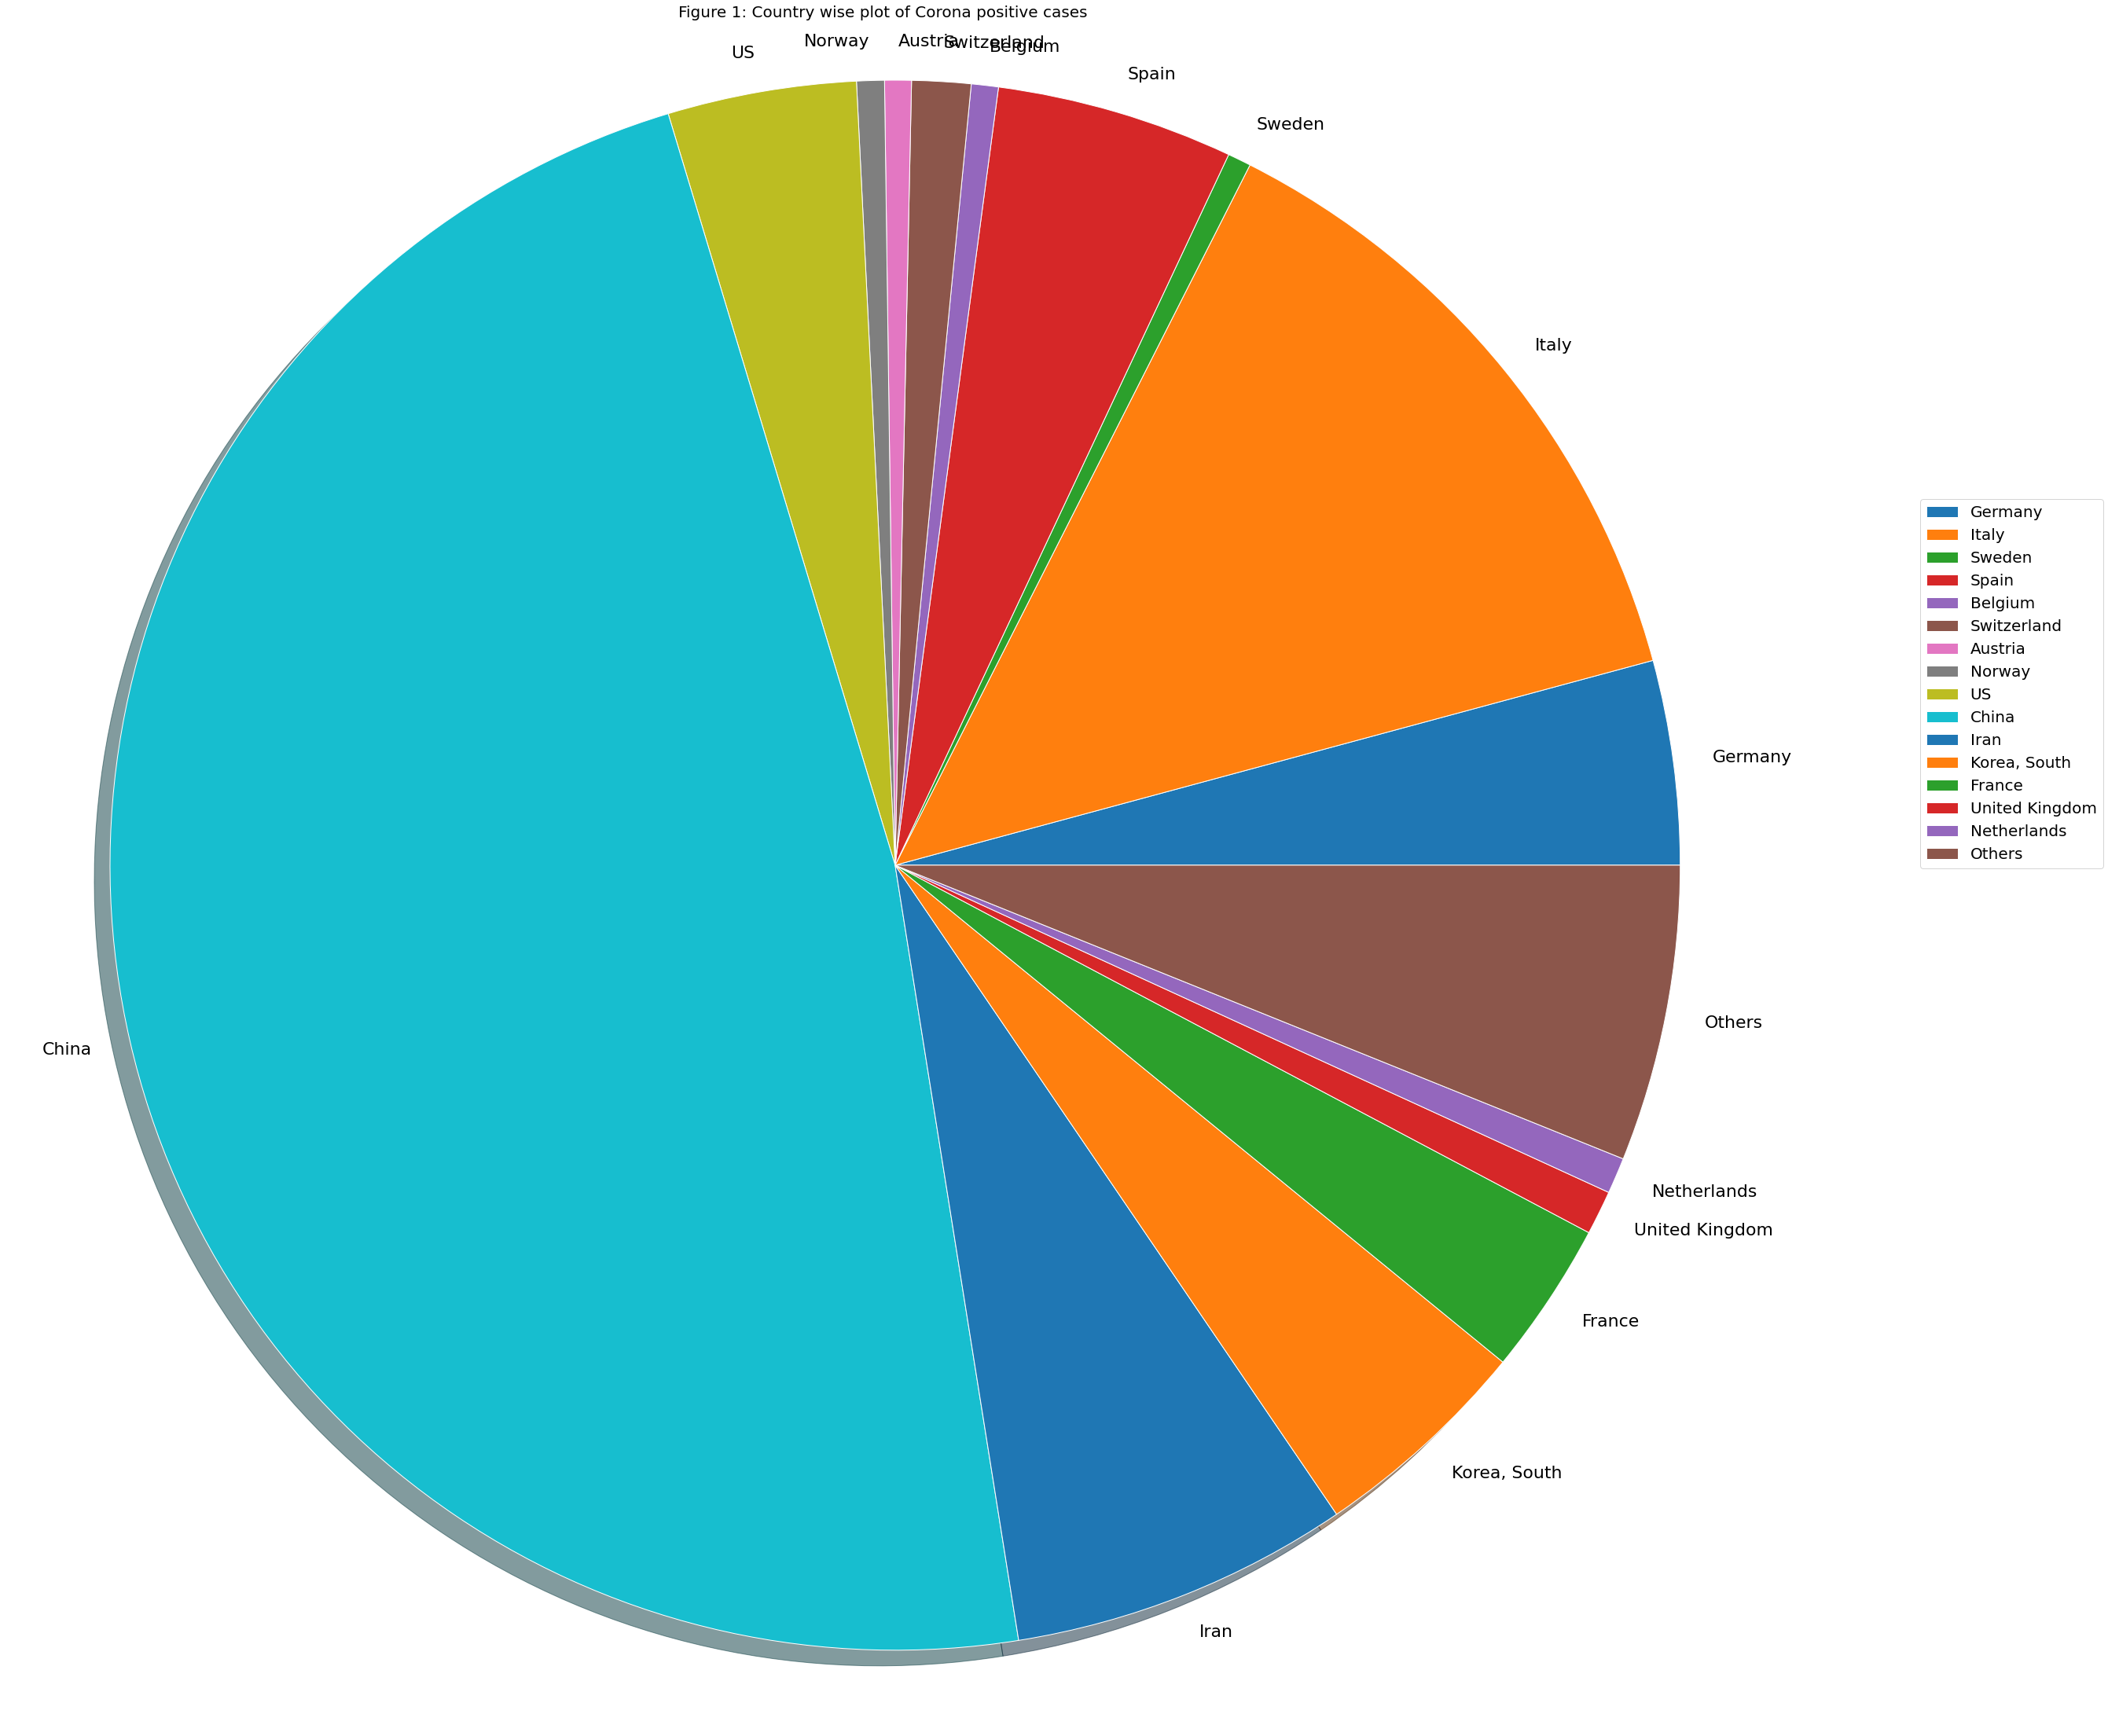

In [7]:
#Country wise plot of Corona positive cases
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=[40, 40])
ax = fig.add_subplot(111)
sizes=country_sizes
pie_wedge_collection = ax.pie(sizes, labels=country_labels, labeldistance=1.05,shadow=True)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    

ax.set_title( "Figure 1: Country wise plot of Corona positive cases",fontsize=20)
ax.axis('equal')
ax.legend(loc='lower right',bbox_to_anchor=(1.2, 0.5),fontsize=20)


### **Datewise Plot**

In [8]:
df_covid.columns

Index(['Country/Region', 'Lat', 'Long', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       'sum'],
      dtype='object')

In [9]:
#Computed the sum of Corona positive cases date wise and put it in a new row of the dataframe
drop_columns=['Lat', 'Long','Country/Region','sum']
for i in range(0,len(drop_columns)):
  if drop_columns!=0:
    df_covid.drop(labels=drop_columns[i],axis=1,inplace=True)
    i=i-1
dates_list=[]
for col in df_covid.columns:
   dates_list.append(col)
print(dates_list)
df_covid.loc['Total'] = pd.Series(df_covid.sum())
datewise_sum=[]
for value in df_covid.iloc[-1].values:
  datewise_sum.append(value)
print(datewise_sum)

['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20']
[95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708, 272166, 304524, 335955]


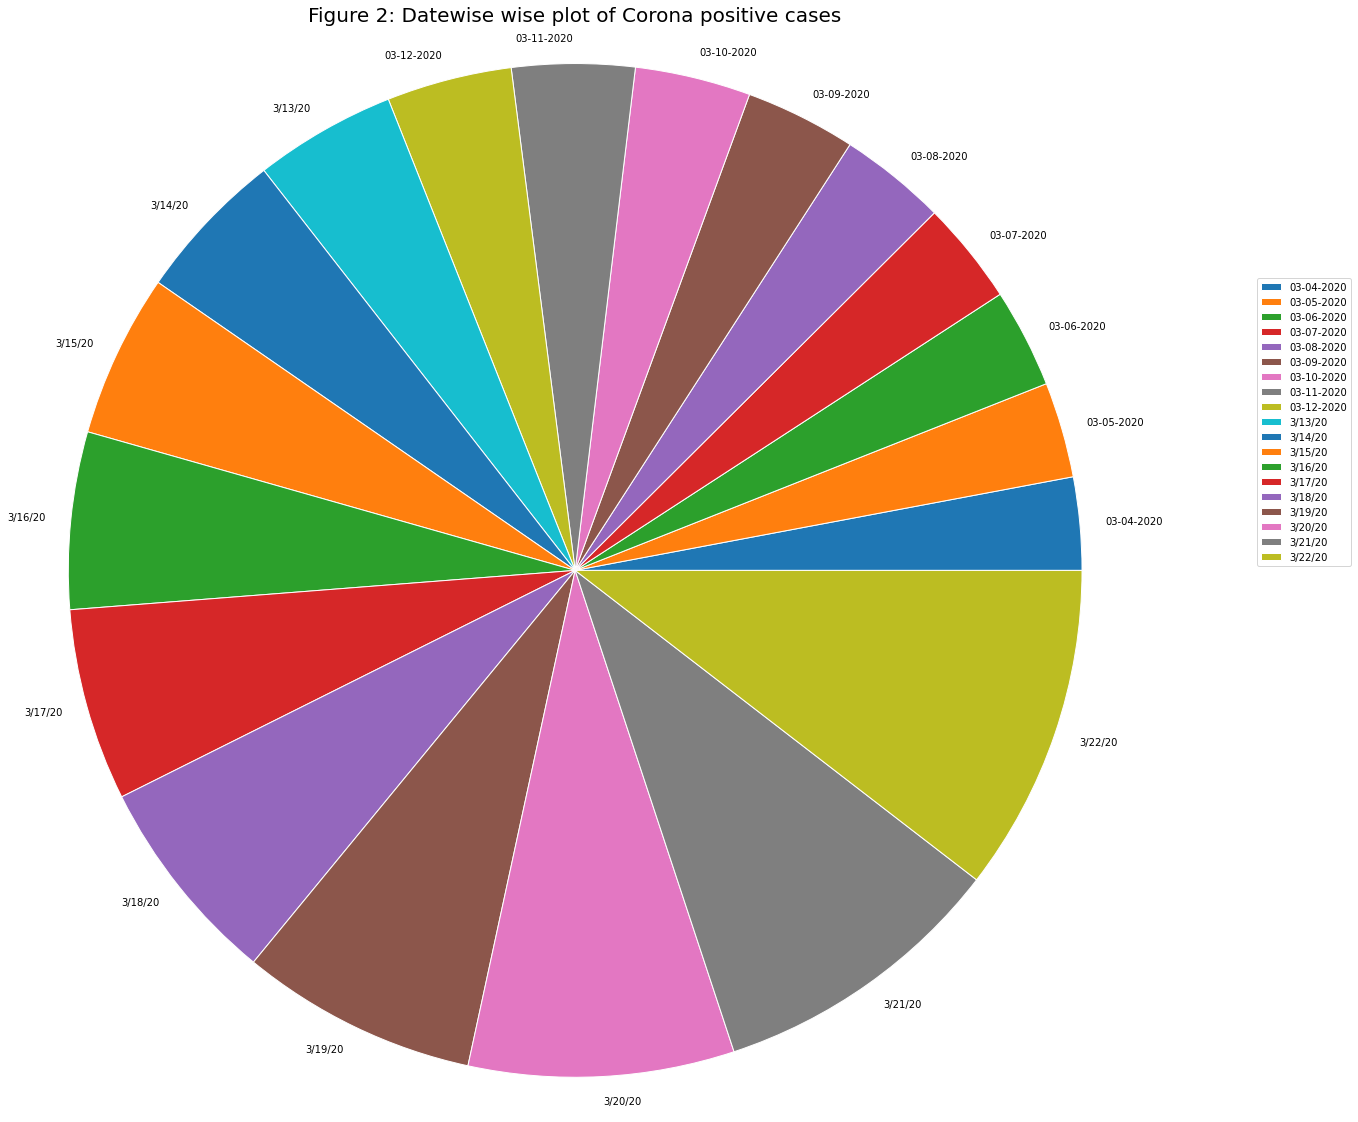

In [10]:
#Date wise plot of Corona positive cases
plt.rcParams.update({'font.size': 10})
sizes=datewise_sum
labels=dates_list
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, labeldistance=1.05)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    

ax.set_title( "Figure 2: Datewise wise plot of Corona positive cases",fontsize=20)
ax.axis('equal')
ax.legend(loc='lower right',bbox_to_anchor=(1.2, 0.5),fontsize=10)